Fraud Detection Notebook

This dataset contains information about Fraud Detection

Step : This feature represents the day from the start of simulation. It has 180 steps so simulation ran for virtually 6 months.
Customer : It's the unique ID attributed to a particular customer
Age : Classification of a customer's age 
0: <= 18,
1: 19-25,
2: 26-35,
3: 36-45,
4: 46:55,
5: 56:65,
6: > 65
U: Unknown
Gender : Gender of the customer - F -> Female , M -> Male , U -> Unknown, E -> Enterprise
ZipcodeOri : Zip code of the customer
Merchant : It's the unique ID attributed to a particular merchant
ZipMerchant : Zip code of the merchant
Category : Line of business of the merchant or the services provided by the merchant
Amount : The amount of transaction performed by the customer
Fraud : 0 indicates genuine transaction, 1 indicates fraudulent activity

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

!pip3 install plotly
import plotly.express as px
import plotly.graph_objs as go
%matplotlib inline

In [16]:
bankFraud = pd.read_csv('./bs140513_032310.csv')

In [17]:
bankFraud.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151',4,M,'28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107',2,M,'28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914',4,F,'28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790',3,M,'28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768',5,M,'28007','M348934600','28007','es_transportation',35.72,0


In [18]:
unwantedFeatures = ['zipcodeOri','zipMerchant']
features = bankFraud.drop(unwantedFeatures, axis=1, inplace=True)

In [19]:
bankFraud.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,0,'C1093826151',4,M,'M348934600','es_transportation',4.55,0
1,0,'C352968107',2,M,'M348934600','es_transportation',39.68,0
2,0,'C2054744914',4,F,'M1823072687','es_transportation',26.89,0
3,0,'C1760612790',3,M,'M348934600','es_transportation',17.25,0
4,0,'C757503768',5,M,'M348934600','es_transportation',35.72,0


In [20]:
bankFraud['age'] = bankFraud['age'].replace(['U'],'7')

In [21]:
# We used this method to convert column age which was intially documented as string to an integer to facilitate our analysis.
bankFraud['age'] = bankFraud['age'].apply(pd.to_numeric)
bankFraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   step      594643 non-null  int64  
 1   customer  594643 non-null  object 
 2   age       594643 non-null  int64  
 3   gender    594643 non-null  object 
 4   merchant  594643 non-null  object 
 5   category  594643 non-null  object 
 6   amount    594643 non-null  float64
 7   fraud     594643 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 36.3+ MB


In [22]:
bankFraud.pivot_table('amount', index='age', columns='fraud', aggfunc='count')

fraud,0,1
age,,
0,2404,48
1,57442,689
2,184966,2344
3,145376,1755
4,107615,1410
5,61956,686
6,26513,261
7,1171,7


In [23]:
bankFraud.pivot_table('amount', index='age', columns='fraud', aggfunc='sum')

fraud,0,1
age,,
0,82720.95,31549.35
1,1837376.23,344333.05
2,5890536.90,1294385.94
3,4638868.35,934412.47
4,3428335.66,736585.29
5,1946071.21,335740.76
6,844690.13,142350.10
7,39833.13,3314.21


The column age has 7 unknown age values which were engaged in a count of 7 transactions totalling $3314.12. Compared to the other values, this amount appears insignificant, hence we decided to remove it for analytical purposes. 

In [24]:
bankFraud.groupby('fraud').describe()

step                                                         \
          count       mean        std  min    25%   50%     75%    max   
fraud                                                                    
0      587443.0  95.054077  51.038755  0.0  52.00  97.0  139.00  179.0   
1        7200.0  89.500000  51.964331  0.0  44.75  89.5  134.25  179.0   

            age            ...              amount                          \
          count      mean  ...  75%  max     count        mean         std   
fraud                      ...                                               
0      587443.0  3.014790  ...  4.0  7.0  587443.0   31.847230   31.470876   
1        7200.0  2.962083  ...  4.0  7.0    7200.0  530.926551  835.587112   

                                                 
        min     25%      50%       75%      max  
fraud                                            
0      0.00   13.59   26.610   41.8950  2144.86  
1      0.03  159.98  319.175  548.9775  8329.96  

[2 rows x 24 columns]

From the describe method, we've learned that the mean avg for genuine transactions is approx 32 dollars, while the mean avg for fraudulent transactions is approx 531 dollars. We also noted that the maximum amount involved in a single fraudulent transaction was approx $8330. 
We can also infer that the fraudulent activities were done by people in the age group of between their mid 20s to mid 40s.

In [25]:
bankFraud.pivot_table('amount', index='gender', columns='fraud', aggfunc='sum')

fraud,0,1
gender,,
E,39833.13,3314.21
F,10223625.68,2503555.82
M,8428746.65,1315801.14
U,16227.10,NaN


In [26]:
# Convert 'Gender' to 1,2,3,4 instead of F,M,E,U
# .map() will map values in the original to values in the specified data
genderFlag = {
    'F': 1,
    'M': 2,
    'E': 3,
    'U': 4
}

bankFraud['gender'] = bankFraud['gender'].map(genderFlag)
bankFraud.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,0,'C1093826151',4,2,'M348934600','es_transportation',4.55,0
1,0,'C352968107',2,2,'M348934600','es_transportation',39.68,0
2,0,'C2054744914',4,1,'M1823072687','es_transportation',26.89,0
3,0,'C1760612790',3,2,'M348934600','es_transportation',17.25,0
4,0,'C757503768',5,2,'M348934600','es_transportation',35.72,0


<Figure size 432x288 with 0 Axes>

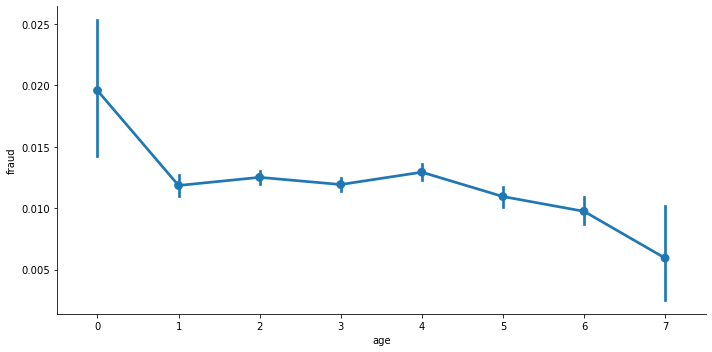

In [29]:
for i, col in enumerate(['age']):
  # Use matplotlib to create a unique figure
  plt.figure(i)

  # Add a categorical plot to each figure
  sns.catplot(x=col, y='fraud', data=bankFraud, kind='point', aspect=2)

In [30]:
# Counts missing value in the data frame
bankFraud.isnull().sum()

step        0
customer    0
age         0
gender      0
merchant    0
category    0
amount      0
fraud       0
dtype: int64

With this method, we have concluded that there are no missing values

In [31]:
bankFraud.groupby('category')[['fraud']].sum()

,fraud
category,
'es_barsandrestaurants',120
'es_contents',0
'es_fashion',116
'es_food',0
'es_health',1696
'es_home',302
'es_hotelservices',548
'es_hyper',280
'es_leisure',474


In [32]:
bankFraud = pd.get_dummies(bankFraud, columns=['category'])
bankFraud.head()

,step,customer,age,gender,merchant,amount,fraud,category_'es_barsandrestaurants',category_'es_contents',category_'es_fashion',...,category_'es_home',category_'es_hotelservices',category_'es_hyper',category_'es_leisure',category_'es_otherservices',category_'es_sportsandtoys',category_'es_tech',category_'es_transportation',category_'es_travel',category_'es_wellnessandbeauty'
0,0,'C1093826151',4,2,'M348934600',4.55,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,'C352968107',2,2,'M348934600',39.68,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,'C2054744914',4,1,'M1823072687',26.89,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,'C1760612790',3,2,'M348934600',17.25,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,'C757503768',5,2,'M348934600',35.72,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
